#**Analyzing Weather and Geography-Related Flight Delays**
---
###**Created By**
Srutha Keerthy Dasoju, Alyssa Duran, Naga Nikhitha Kondamuri, Madison Bochard, Ciara Germany

</br>

###**Description**
The purpose of this notebook is to perform exploratory data analysis on flight delay data. The goal is to find patterns that could explain how flight delays are affected by weather conditions and/or geographical locations. The following questions will guide this project:
* Are airlines better prepared to handle extreme seasonal climates than sudden, unpredictable weather changes?
* What specific weather conditions (e.g., wind speed, precipitation, temperature, and visibility) have the highest impact on flight delays?
* How do airports in geographically challenging areas (like mountainous regions and coastal airports) handle delays differently than airports in more standard geographic locations?

For this exploratory data analysis project, we will be focusing on flight delays for 19 selected airports located in Texas in 2023.


</br>

###**Dataset Files**
A compressed zip folder containing all necessary files will be provided. The following are the dataset files required to run this notebook and some information about the files:
* **Flight Delay Dataset** - `Airline_Delay_Cause.csv`
  * Monthly flight delay data for 2023
* **Airport Coordinates Dataset** - `Updated_Airport_Coordinates.csv`
  * Manually created by finding the latitude and longitude of the seleced airports
  * Used to find the weather data for the selected airports
* **Weather Dataset** - `complete_weather_texas.csv`
  * Daily weather data for 2023 for the selected airports
* **Weather Location Key Dataset** - `weather_airport_key.csv`
  * Used to connect the weather dataset to the coordinates and flight delay datasets

</br>

###**Dataset Connections**
* The `airport` feature of the Flight Delay dataset connects to the `Airport Code` feature of the  Airport Coordinates dataset
* The indexes of the Weather Location Key dataset and the Airport Coordinates dataset are the same since the Airport Coordinates dataset was used to create the Weather Location Key dataset
* The `location_id` feature of the Weather Location Key dataset connects to the `location_id` feature of the Weather dataset

</br>

###**Data Definitions**

Flight Delay Dataset
* `year`:	YYYY format
* `month`:	MM format (1-12)
* `carrier`:	Code assigned by assigned by US DOT to identify a unique airline carrier
* `carrier_name`:	Unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation
* `airport`:	A three character alpha-numeric code issued by the U.S. Department of Transportation which is the official designation of the airport
* `airport_name`:	A place from which aircraft operate that usually has paved runways and maintenance facilities and often serves as a terminal
* `arr_flights`:	Arrival Flights
* `arr_del15`:	Arrival Delay Indicator, 15 Minutes or More Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.
* `carrier_ct`:	Carrier Count for airline cause of delay
* `weather_ct`:	Weather Count for airline cause of delay
* `nas_ct`:	NAS (National Air System) Count for airline cause of delay
* `security_ct`:	Security County for airline cause of delay
* `late_aircraft_ct`:	Late Aircraft Delay Count for airline cause of delay
* `arr_cancelled`:	Flight cancelled
* `arr_diverted`:	Flight diverted
* `arr_delay`:	Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
* `carrier_delay`:	Carrier Delay, in Minutes
* `weather_delay`:	Weather Delay, in Minutes
* `nas_delay`:	National Air System Delay, in Minutes
* `security_delay`:	Security Delay, in Minutes
* `late_aircraft_delay`:	Late Aircraft Delay, in Minutes

</br>

Airport Coordinates Dataset
* `Airport Code`:	A three character alpha-numeric code issued by the U.S. Department of Transportation which is the official designation of the airport
* `City`:	The city where the airport is located
* `Latitude`:	The approximate latitude coordinate of the airport
* `Longitude`: The approximate longitude coordinate of the airport

</br>

Weather Dataset
* `location_id`: The id that connects to datasets with airport latitude and longitude
* `time`: The date that the data was collected (daily data)
* `weather_code (wmo code)`: The most severe daily weather condition on a given day
* `temperature_2m_max (°C)`: Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min (°C)`: Minimum dairly air temperature at 2 meters above ground
* `temperature_2m_mean (°C)`: Average of daily air temperature at 2 meters above ground
* `apparent_temperature_max (°C)`: Maximum daily apparent temperature.
* `apparent_temperature_min (°C)`: Minimum daily apparent temperature.
* `apparent_temperature_mean (°C)`: Average daily apparent temperature.
* `precipitation_sum (mm)`: Sum of daily precipitation (including rain, showers and snowfall)
* `rain_sum (mm)`: Sum of daily rain
* `snowfall_sum (cm)`: Sum of daily snowfall
* `precipitation_hours (h)`: The number of hours with rain.
* `wind_speed_10m_max (km/h)`: Maximum wind speed on a day
* `wind_gusts_10m_max (km/h)`: Maximum wind gusts on a day
* `wind_direction_10m_dominant (°)`: Dominant wind direction

</br>

Weather Location Key Dataset
* `location_id`: The id that connects the weather dataset to the airport coordinates
* `latitude`:	The approximate latitude coordinate of the airport
* `longitude`:	The approximate longitude coordinate of the airport
* `elevation`: The elevation of the airport

#**Section 1: Importing the Data**

In this section, the necessary python libraries and datasets will be imported. For detailed information about the datasets, please reference the `Dataset Files` and `Data Definitions` sections above. The following libraries will be imported:
* pandas
  * Used for data manipulation and analysis
* Matplotlib
  * Used to create data visualizations
* seaborn
  * Built off of Matplotlib
  * Used to create more visually dynamic visualizations
* calendar
  * Used to assist in the creation of visualizations in Section 3.4

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Used to display the visualizations within the colab
%matplotlib inline

In [ ]:
# Importing the Flight Delay dataset
flight_delay_data_original = pd.read_csv('Airline_Delay_Cause.csv')
flight_delay_data_original.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [ ]:
# Importing the Airport Coordinates dataset
airport_coords_data_original = pd.read_csv('Updated_Airport_Coordinates.csv')
airport_coords_data_original

,Airport Code,City,Latitude,Longitude
0,CLL,"College Station/Bryan, TX",30.5881,-96.3638
1,ABI,"Abilene, TX",32.4113,-99.6819
2,MBS,"Saginaw/Bay City/Midland, MI",43.5329,-84.0796
3,BPT,"Beaumont/Port Arthur, TX",29.9508,-94.0207
4,ACT,"Waco, TX",31.6113,-97.2305
5,CRP,"Corpus Christi, TX",27.7704,-97.5012
6,TYR,"Tyler, TX",32.3541,-95.4023
7,GRK,"Killeen, TX",31.0670,-97.8289
8,DFW,"Dallas/Fort Worth, TX",32.8998,-97.0403
9,AMA,"Amarillo, TX",35.2194,-101.7059


In [ ]:
# Importing the Weather dataset
weather_original = pd.read_csv('complete_weather_texas.csv')
weather_original.head()

,location_id,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°)
0,0,1/1/23,51,23.8,13.6,17.9,23.4,12.1,16.9,0.1,0.1,0.0,1,22.5,41.8,191
1,0,1/2/23,65,22.8,18.9,20.8,23.4,19.3,21.6,42.9,42.9,0.0,13,25.6,52.9,169
2,0,1/3/23,63,22.3,13.8,19.2,22.7,13.2,18.6,9.4,9.4,0.0,3,24.7,44.6,251
3,0,1/4/23,2,19.2,9.7,14.1,16.5,6.4,11.2,0.0,0.0,0.0,0,12.6,23.8,283
4,0,1/5/23,1,17.8,6.2,11.6,15.6,3.1,9.1,0.0,0.0,0.0,0,12.0,22.3,31


In [ ]:
# Importing the Weather Location Key dataset
weather_location_key_original = pd.read_csv('weather_airport_key.csv')
weather_location_key_original.head()

,location_id,latitude,longitude,elevation
0,0,30.615112,-96.360410,94
1,1,32.442883,-99.732700,544
2,2,43.550087,-84.045105,201
3,3,29.982424,-93.985990,3
4,4,31.599297,-97.221560,154


#**Section 2: Pre-Processing the Data**

In this section, pre-processing will be done on the datasets. This will involve the following:
* Filtering the datasets to match the same time-period
  * Time-period = 2023
* Filtering the datasets to match the same location
  * Location = Texas
  * The flight delay data contains locations from all over the US. The airport_coords_data contains the airport codes of the 21 airports selected to be focused on for Texas.
* Dropping unnecessary columns
* Transforming the weather data from daily to monthly values
* Combining the flight coords and weather key datasets
  * This will be done for simplicity as these two datasets work together to connect the flight delay data to the weather data.

In [ ]:
# Creating a copy of each dataset to prepare for pre-processing
flight_delay_data = flight_delay_data_original.copy()
airport_coords_data = airport_coords_data_original.copy()
weather_data = weather_original.copy()
weather_location_key_data = weather_location_key_original.copy()

**2.1 Filtering the datasets to match the same time-period.**

In [ ]:
# Checking the time-period for the 'flight_delay_data'
flight_delay_data['year'].value_counts()

,count
year,
2023,22621


In [ ]:
# Checking the time-period for the 'weather_data'
weather_data['time'].value_counts().sort_index()

,count
time,
1/1/23,21
1/1/24,21
1/10/23,21
1/11/23,21
1/12/23,21
...,...
9/5/23,21
9/6/23,21
9/7/23,21


In [ ]:
# Spliting the 'time' feature of 'weather_data' into the features 'month', 'day', and 'year'
# We only need to keep the 'month' and 'year' values
weather_data['month'] = weather_data['time'].str.split('/', expand=True)[0]
weather_data['year'] = weather_data['time'].str.split('/', expand=True)[2]
weather_data

,location_id,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),month,year
0,0,1/1/23,51,23.8,13.6,17.9,23.4,12.1,16.9,0.1,0.1,0.0,1,22.5,41.8,191,1,23
1,0,1/2/23,65,22.8,18.9,20.8,23.4,19.3,21.6,42.9,42.9,0.0,13,25.6,52.9,169,1,23
2,0,1/3/23,63,22.3,13.8,19.2,22.7,13.2,18.6,9.4,9.4,0.0,3,24.7,44.6,251,1,23
3,0,1/4/23,2,19.2,9.7,14.1,16.5,6.4,11.2,0.0,0.0,0.0,0,12.6,23.8,283,1,23
4,0,1/5/23,1,17.8,6.2,11.6,15.6,3.1,9.1,0.0,0.0,0.0,0,12.0,22.3,31,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,20,12/28/23,0,12.7,3.9,8.8,8.5,0.6,5.2,0.0,0.0,0.0,0,21.7,45.0,331,12,23
7682,20,12/29/23,1,12.1,2.7,7.3,7.4,-1.0,3.7,0.0,0.0,0.0,0,17.7,33.1,316,12,23
7683,20,12/30/23,0,17.3,1.9,9.0,14.4,-1.3,6.0,0.0,0.0,0.0,0,12.1,21.6,273,12,23
7684,20,12/31/23,2,21.6,5.7,12.4,19.8,2.6,10.2,0.0,0.0,0.0,0,16.4,30.2,207,12,23


In [ ]:
# Dropping any 2024 observation from the 'weather_data'
weather_data = weather_data[weather_data['year'] == '23']
weather_data.tail()

,location_id,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),month,year
7680,20,12/27/23,3,17.6,7.4,11.4,13.4,4.5,9.0,0.0,0.0,0.0,0,19.6,36.0,325,12,23
7681,20,12/28/23,0,12.7,3.9,8.8,8.5,0.6,5.2,0.0,0.0,0.0,0,21.7,45.0,331,12,23
7682,20,12/29/23,1,12.1,2.7,7.3,7.4,-1.0,3.7,0.0,0.0,0.0,0,17.7,33.1,316,12,23
7683,20,12/30/23,0,17.3,1.9,9.0,14.4,-1.3,6.0,0.0,0.0,0.0,0,12.1,21.6,273,12,23
7684,20,12/31/23,2,21.6,5.7,12.4,19.8,2.6,10.2,0.0,0.0,0.0,0,16.4,30.2,207,12,23


**2.2 Filtering the datasets to only include Texas airports**

In [ ]:
# Spliting the 'City' feature of 'airport_coords_data' to add a 'state' feature
airport_coords_data['state'] = airport_coords_data['City'].str.split(', ', expand = True)[1]
airport_coords_data.head()

,Airport Code,City,Latitude,Longitude,state
0,CLL,"College Station/Bryan, TX",30.5881,-96.3638,TX
1,ABI,"Abilene, TX",32.4113,-99.6819,TX
2,MBS,"Saginaw/Bay City/Midland, MI",43.5329,-84.0796,MI
3,BPT,"Beaumont/Port Arthur, TX",29.9508,-94.0207,TX
4,ACT,"Waco, TX",31.6113,-97.2305,TX


In [ ]:
# Filtering the 'airport_coords_data' df to only include airports from Texas
airport_coords_data = airport_coords_data[airport_coords_data['state'] == 'TX']

# Validate
airport_coords_data['state'].value_counts()

,count
state,
TX,19


In [ ]:
# Filtering the 'flight_delay_data' df to only include airports in the 'airport_coords_data' df
flight_delay_texas = flight_delay_data[flight_delay_data['airport'].isin(airport_coords_data['Airport Code'])]

# Validate
flight_delay_texas['airport'].value_counts()

,count
airport,
AUS,191
IAH,159
DFW,141
SAT,138
ELP,128
HOU,75
MFE,73
MAF,71
LBB,65


**2.3 Dropping unnecessary attributes**

These attributes were determined by the group to not be necessary for flight delay analysis. The following are the specified reasons:
* `flight_delay_data`
  * `year`: All of the data is for the year 2023, so this information is redundant
  * `arr_cancelled`: The focus of the analysis is flight delays, so flight cancellation data is unneeded
  * `arr_diverted`: The focus of the analysis is flight delays, so diverted flight data is unneeded
* `weather_data`
  * `time`: This attribute is no longer needed after extracting the month and year values
  * `wind_direction_10m_dominant`: This is unneeded since the data would only be useful if we knew the direction the airplanes were pointed when taking off
  * `year`: All of the data is for the year 2023, so this information is redundant

In [ ]:
# Dropping 'year', 'arr_cancelled', and 'arr_diverted' from 'flight_delay_data'
flight_delay_data = flight_delay_data.drop(columns=['year', 'arr_cancelled', 'arr_diverted'])
flight_delay_data

,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,0.73,0.0,0.81,672.0,61.0,574.0,20.0,0.0,17.0
1,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,1.00,0.0,1.75,348.0,252.0,0.0,33.0,0.0,63.0
2,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,1.06,0.0,3.00,859.0,536.0,0.0,47.0,0.0,276.0
3,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,0.00,0.0,1.44,75.0,9.0,0.0,0.0,0.0,66.0
4,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22616,1,ZW,Air Wisconsin Airlines Corp,STL,"St. Louis, MO: St Louis Lambert International",2.0,1.0,0.00,1.00,0.00,0.0,0.00,38.0,0.0,38.0,0.0,0.0,0.0
22617,1,ZW,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY: Syracuse Hancock International",31.0,6.0,3.49,0.00,0.67,0.0,1.84,1018.0,739.0,0.0,34.0,0.0,245.0
22618,1,ZW,Air Wisconsin Airlines Corp,TUL,"Tulsa, OK: Tulsa International",27.0,6.0,1.94,0.00,2.24,0.0,1.82,204.0,48.0,0.0,51.0,0.0,105.0
22619,1,ZW,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI: Cherry Capital",62.0,17.0,2.65,0.00,4.54,0.0,9.81,1485.0,250.0,0.0,287.0,0.0,948.0


In [ ]:
# Dropping the 'time', 'wind_direction_10m_dominat', and 'year' from 'weather_data' dataframe
weather_data = weather_data.drop(columns=['time', 'wind_direction_10m_dominant (°)', 'year'])
weather_data

,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),month
0,0,51,23.8,13.6,17.9,23.4,12.1,16.9,0.1,0.1,0.0,1,22.5,41.8,1
1,0,65,22.8,18.9,20.8,23.4,19.3,21.6,42.9,42.9,0.0,13,25.6,52.9,1
2,0,63,22.3,13.8,19.2,22.7,13.2,18.6,9.4,9.4,0.0,3,24.7,44.6,1
3,0,2,19.2,9.7,14.1,16.5,6.4,11.2,0.0,0.0,0.0,0,12.6,23.8,1
4,0,1,17.8,6.2,11.6,15.6,3.1,9.1,0.0,0.0,0.0,0,12.0,22.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,20,3,17.6,7.4,11.4,13.4,4.5,9.0,0.0,0.0,0.0,0,19.6,36.0,12
7681,20,0,12.7,3.9,8.8,8.5,0.6,5.2,0.0,0.0,0.0,0,21.7,45.0,12
7682,20,1,12.1,2.7,7.3,7.4,-1.0,3.7,0.0,0.0,0.0,0,17.7,33.1,12
7683,20,0,17.3,1.9,9.0,14.4,-1.3,6.0,0.0,0.0,0.0,0,12.1,21.6,12


**2.4 Transforming key features of weather dataset from daily to monthly values appropriately.**

*   `weather_code`: The mode value will be selected for each month. If there is a multi-modal result, the weather code for the worse weather condition would be chosen.
* `temperature_2m_max (°C)`: The max value will be taken for each month.
* `temperature_2m_min (°C)`: The min value will be taken for each month.
* `temperature_2m_mean (°C)`: The mean value will be taken for each month.
* `apparent_temperature_max (°C)`: The max value will be taken for each month.
* `apparent_temperature_min (°C)`: The min value will be taken for each month.
* `apparent_temperature_mean`: The mean value will be taken for each month.
* `precipitation_sum (mm)`: The mean value will be taken for each month.
* `rain_sum (mm)`: The mean value will be taken for each month.
* `snowfall_sum (cm)`: The mean value will be taken for each month.
* `precipitation_hours (h)`: The mean value will be taken for each month.
* `wind_speed_10m_max (km/h)`: The max value will be taken for each month.
* `wind_gusts_10m_max (km/h)`: The max value will be taken for each month.


In [ ]:
# Aggregating the 'weather_data' from daily to monthly values based on the above aggregations methods

weather_monthly_agg = weather_data.groupby(['location_id', 'month']).agg(
    weather_code = ('weather_code (wmo code)', pd.Series.mode),
    temperature_2m_max = ('temperature_2m_max (°C)', pd.Series.max),
    temperature_2m_min = ('temperature_2m_min (°C)', pd.Series.min),
    temperature_2m_mean = ('temperature_2m_mean (°C)', pd.Series.mean),
    apparent_temperature_max = ('apparent_temperature_max (°C)', pd.Series.max),
    apparent_temperature_min = ('apparent_temperature_min (°C)', pd.Series.min),
    apparent_temperature_mean = ('apparent_temperature_mean (°C)', pd.Series.mean),
    precipitation_sum = ('precipitation_sum (mm)', pd.Series.mean),
    rain_sum = ('rain_sum (mm)', pd.Series.mean),
    snowfall_sum = ('snowfall_sum (cm)', pd.Series.mean),
    precipitation_hours = ('precipitation_hours (h)', pd.Series.mean),
    wind_speed_10m_max = ('wind_speed_10m_max (km/h)', pd.Series.max),
    wind_gusts_10m_max = ('wind_gusts_10m_max (km/h)', pd.Series.max)
)

weather_monthly_agg.reset_index(inplace=True)
weather_monthly_agg

,location_id,month,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,0,1,1,24.8,-0.3,12.990323,24.5,-5.7,10.641935,3.451613,3.451613,0.0,3.419355,34.8,60.8
1,0,10,51,34.5,6.0,21.922581,35.3,0.5,21.745161,2.280645,2.280645,0.0,3.225806,33.5,58.7
2,0,11,3,30.0,2.8,15.416667,30.1,-0.9,13.810000,1.736667,1.736667,0.0,2.433333,33.4,57.6
3,0,12,"[0, 1, 51]",26.9,0.3,13.058065,25.8,-3.7,10.400000,0.887097,0.887097,0.0,1.774194,30.3,54.7
4,0,2,51,27.1,-0.5,13.310714,28.9,-5.6,11.117857,2.075000,2.075000,0.0,3.500000,34.0,61.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,20,5,51,31.6,14.5,23.890323,36.5,13.8,26.593548,6.987097,6.987097,0.0,5.451613,29.3,51.5
248,20,6,"[3, 51]",37.9,19.6,28.500000,44.1,22.6,32.740000,2.356667,2.356667,0.0,1.966667,26.6,50.0
249,20,7,51,38.0,23.9,29.906452,42.8,27.7,34.806452,2.222581,2.222581,0.0,2.935484,25.6,47.2
250,20,8,51,41.3,24.6,31.770968,44.0,25.0,35.538710,0.203226,0.203226,0.0,0.838710,30.3,58.0


In [ ]:
# Checkpoint to ensure that the weather aggregation is correct
weather_monthly_location_0_ = weather_data[weather_data['location_id'] == 0]
weather_monthly_location_0_ = weather_monthly_location_0_[['temperature_2m_max (°C)', 'month']]

weather_monthly_location_0_.groupby(['month']).max()

,temperature_2m_max (°C)
month,
1,24.8
10,34.5
11,30.0
12,26.9
2,27.1
3,30.3
4,32.3
5,31.9
6,37.9


In [ ]:
# Checkpoint to ensure that the original dataset wasn't altered
weather_original.tail()

,location_id,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°)
7681,20,12/28/23,0,12.7,3.9,8.8,8.5,0.6,5.2,0.0,0.0,0.0,0,21.7,45.0,331
7682,20,12/29/23,1,12.1,2.7,7.3,7.4,-1.0,3.7,0.0,0.0,0.0,0,17.7,33.1,316
7683,20,12/30/23,0,17.3,1.9,9.0,14.4,-1.3,6.0,0.0,0.0,0.0,0,12.1,21.6,273
7684,20,12/31/23,2,21.6,5.7,12.4,19.8,2.6,10.2,0.0,0.0,0.0,0,16.4,30.2,207
7685,20,1/1/24,55,18.1,13.2,16.0,16.3,13.0,15.4,3.3,3.3,0.0,9,17.9,33.8,30


**2.5 Combining the 'airport_coords_data' with the 'weather_location_key_data' using "location_id".**

In [ ]:
# Fetching locations from 'weather_location_key_data' dataset
locations = weather_location_key_data['location_id']

# Creating a new dataset
airport_weather_key = airport_coords_data.copy()

# Creating a new column in with the retrieved location ids
airport_weather_key['location_id'] = locations
airport_weather_key

,Airport Code,City,Latitude,Longitude,state,location_id
0,CLL,"College Station/Bryan, TX",30.5881,-96.3638,TX,0
1,ABI,"Abilene, TX",32.4113,-99.6819,TX,1
3,BPT,"Beaumont/Port Arthur, TX",29.9508,-94.0207,TX,3
4,ACT,"Waco, TX",31.6113,-97.2305,TX,4
5,CRP,"Corpus Christi, TX",27.7704,-97.5012,TX,5
6,TYR,"Tyler, TX",32.3541,-95.4023,TX,6
7,GRK,"Killeen, TX",31.0670,-97.8289,TX,7
8,DFW,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8
9,AMA,"Amarillo, TX",35.2194,-101.7059,TX,9
11,LBB,"Lubbock, TX",33.6636,-101.8228,TX,11


#**Section 3: EDA & Data Visualization**

In this section, exploratory data analysis (EDA) will be performed on the now pre-processed datasets. The purpose of this section is to learn about our data and find hidden patterns. Viszualizations will be used in order to assist in finding correlations and trends.

**Some Exploratory questions**
* How do we differentiate extreme weather conditions from sudden change in weather based on our weather-data? Is the data collected sufficient or do we need more?
* How do we quantify the affect of a specific weather condition on flight delay?
* How do we differentiate geographically challenging areas from more standard geographic locations?

**3.1 Learning about the datasets**

In [ ]:
# What does the 'flight_delay_texas' data look like?
flight_delay_texas.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
6,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,7.07,0.00,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0
113,2023,12,AA,American Airlines Network,AMA,"Amarillo, TX: Rick Husband Amarillo International",60.0,16.0,6.47,0.99,3.41,0.00,5.13,0.0,0.0,846.0,303.0,136.0,80.0,0.0,327.0
116,2023,12,AA,American Airlines Network,AUS,"Austin, TX: Austin - Bergstrom International",1214.0,247.0,72.62,2.27,85.34,1.36,85.41,0.0,1.0,12022.0,3843.0,68.0,2745.0,127.0,5239.0
141,2023,12,AA,American Airlines Network,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13176.0,2012.0,609.65,25.67,631.08,8.49,737.10,6.0,10.0,153147.0,63688.0,1323.0,17883.0,431.0,69822.0
142,2023,12,OH,PSA Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",508.0,67.0,13.88,0.75,22.43,0.00,29.94,0.0,0.0,3881.0,1455.0,31.0,563.0,0.0,1832.0


In [ ]:
# How many rows and columns does 'flight_delay_texas' have?
flight_delay_texas.shape

(1338, 21)

In [ ]:
# How many observations are in 'flight_delay_texas'?
flight_delay_texas.size

28098

In [ ]:
# What does the 'weather_monthly_agg' data look like?
weather_monthly_agg.head()

,location_id,month,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,0,1,1,24.8,-0.3,12.990323,24.5,-5.7,10.641935,3.451613,3.451613,0.0,3.419355,34.8,60.8
1,0,10,51,34.5,6.0,21.922581,35.3,0.5,21.745161,2.280645,2.280645,0.0,3.225806,33.5,58.7
2,0,11,3,30.0,2.8,15.416667,30.1,-0.9,13.810000,1.736667,1.736667,0.0,2.433333,33.4,57.6
3,0,12,"[0, 1, 51]",26.9,0.3,13.058065,25.8,-3.7,10.400000,0.887097,0.887097,0.0,1.774194,30.3,54.7
4,0,2,51,27.1,-0.5,13.310714,28.9,-5.6,11.117857,2.075000,2.075000,0.0,3.500000,34.0,61.9


In [ ]:
# How many rows and columns does 'weather_monthly_agg' have?
weather_monthly_agg.shape

(252, 15)

In [ ]:
# How many observations are in 'weather_monthly_agg'?
weather_monthly_agg.size

3780

In [ ]:
# What does the 'airport_weather_key' data look like?
airport_weather_key.head()

,Airport Code,City,Latitude,Longitude,state,location_id
0,CLL,"College Station/Bryan, TX",30.5881,-96.3638,TX,0
1,ABI,"Abilene, TX",32.4113,-99.6819,TX,1
3,BPT,"Beaumont/Port Arthur, TX",29.9508,-94.0207,TX,3
4,ACT,"Waco, TX",31.6113,-97.2305,TX,4
5,CRP,"Corpus Christi, TX",27.7704,-97.5012,TX,5


In [ ]:
# How many rows and columns does 'airport_weather_key' have?
airport_weather_key.shape

(19, 6)

In [ ]:
# How many observations are in 'airport_weather_key'?
airport_weather_key.size

114

**3.2 Finding null values**

In [ ]:
# How many nulls are in each column?
print("Missing values per column:\n", flight_delay_texas.isna().sum())

Missing values per column:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            2
arr_del15              2
carrier_ct             2
weather_ct             2
nas_ct                 2
security_ct            2
late_aircraft_ct       2
arr_cancelled          2
arr_diverted           2
arr_delay              2
carrier_delay          2
weather_delay          2
nas_delay              2
security_delay         2
late_aircraft_delay    2
dtype: int64


In [ ]:
# Handling Missing Values

# Critical Columns (like arr_flights, arr_del15, and all types of delay counts and delay minutes):
# For columns like arr_del15, carrier_ct, weather_ct, etc., missing values may indicate no delays or no flights.
# Filling these with 0 is reasonable since missing values mean that no delays or events occurred.
flight_delay_texas.fillna({
    'arr_flights': 0,
    'arr_del15': 0,
    'carrier_ct': 0,
    'weather_ct': 0,
    'nas_ct': 0,
    'security_ct': 0,
    'late_aircraft_ct': 0,
    'arr_cancelled': 0,
    'arr_diverted': 0,
    'arr_delay': 0,
    'carrier_delay': 0,
    'weather_delay': 0,
    'nas_delay': 0,
    'security_delay': 0,
    'late_aircraft_delay': 0
}, inplace=True)

# Verify
print("Missing values per column:\n", flight_delay_texas.isna().sum())

Missing values per column:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


**3.3 Merging the datasets together for ease of use when creating visualizations**

To start, the `flight_delay_texas` and `airport_weather_key` datasets will be merged together using the three letter airport code values found in each dataset. The column names for the airport codes do not match for the two datasets, so one of the column names must be changed.

Then, the `merged_flight_airport` dataset will be merged with the `weather_monthly_agg` using `location_id` to create the `final_merged_data` dataset.

In [ ]:
# Displaying the 'flight_delay_texas' column that has the airport code values
flight_delay_texas['airport'].head()

,airport
6,AUS
113,AMA
116,AUS
141,DFW
142,DFW


In [ ]:
# Displaying the 'airport_weather_key' column that has the airport code values
airport_weather_key['Airport Code'].head()

,Airport Code
0,CLL
1,ABI
3,BPT
4,ACT
5,CRP


In [ ]:
# Renaming 'Airport Code' in 'airport_weather_key' to 'airport' to match with 'flight_delay_texas'
airport_weather_key = airport_weather_key.rename(columns={'Airport Code': 'airport'})
airport_weather_key.head()

,airport,City,Latitude,Longitude,state,location_id
0,CLL,"College Station/Bryan, TX",30.5881,-96.3638,TX,0
1,ABI,"Abilene, TX",32.4113,-99.6819,TX,1
3,BPT,"Beaumont/Port Arthur, TX",29.9508,-94.0207,TX,3
4,ACT,"Waco, TX",31.6113,-97.2305,TX,4
5,CRP,"Corpus Christi, TX",27.7704,-97.5012,TX,5


In [ ]:
# Pre-merged shape of the datasets
print(flight_delay_texas.shape)
print(airport_weather_key.shape)

(1338, 21)
(19, 6)


In [ ]:
# Merge 'flight_delay_texas' and  'airport_weather_key' on 'airport' column
merged_flight_airport = pd.merge(flight_delay_texas, airport_weather_key, on='airport', how='inner')
merged_flight_airport.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,City,Latitude,Longitude,state,location_id
0,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,7.07,0.00,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,"Austin, TX",30.1945,-97.6699,TX,15
1,2023,12,AA,American Airlines Network,AMA,"Amarillo, TX: Rick Husband Amarillo International",60.0,16.0,6.47,0.99,3.41,0.00,5.13,0.0,0.0,846.0,303.0,136.0,80.0,0.0,327.0,"Amarillo, TX",35.2194,-101.7059,TX,9
2,2023,12,AA,American Airlines Network,AUS,"Austin, TX: Austin - Bergstrom International",1214.0,247.0,72.62,2.27,85.34,1.36,85.41,0.0,1.0,12022.0,3843.0,68.0,2745.0,127.0,5239.0,"Austin, TX",30.1945,-97.6699,TX,15
3,2023,12,AA,American Airlines Network,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13176.0,2012.0,609.65,25.67,631.08,8.49,737.10,6.0,10.0,153147.0,63688.0,1323.0,17883.0,431.0,69822.0,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8
4,2023,12,OH,PSA Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",508.0,67.0,13.88,0.75,22.43,0.00,29.94,0.0,0.0,3881.0,1455.0,31.0,563.0,0.0,1832.0,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8


In [ ]:
# Shape of the datasets to be merged
print(weather_monthly_agg.shape)
print(merged_flight_airport.shape)

(252, 15)
(1338, 26)


In [ ]:
# Displaying the 'weather_monthly_agg' column that has the location ids
weather_monthly_agg['location_id'].head()

,location_id
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Displaying the 'merged_flight_airport' column that has the location ids
merged_flight_airport['location_id'].head()

,location_id
0,15
1,9
2,15
3,8
4,8


In [ ]:
# Convert 'month' column in both DataFrames to string to ensure consistency
merged_flight_airport['month'] = merged_flight_airport['month'].astype(str)
weather_monthly_agg['month'] = weather_monthly_agg['month'].astype(str)

# Now merge using 'location_id' and 'month'
final_merged_data = pd.merge(merged_flight_airport, weather_monthly_agg, on=['location_id', 'month'], how='inner')
final_merged_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,City,Latitude,Longitude,state,location_id,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,7.07,0.00,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,"Austin, TX",30.1945,-97.6699,TX,15,"[0, 1]",25.5,1.1,13.248387,24.7,-3.1,10.877419,1.390323,1.390323,0.00,2.193548,30.2,49.0
1,2023,12,AA,American Airlines Network,AMA,"Amarillo, TX: Rick Husband Amarillo International",60.0,16.0,6.47,0.99,3.41,0.00,5.13,0.0,0.0,846.0,303.0,136.0,80.0,0.0,327.0,"Amarillo, TX",35.2194,-101.7059,TX,9,"[0, 3]",21.8,-4.9,5.822581,14.4,-10.0,0.870968,1.396774,1.296774,0.07,1.774194,47.6,75.2
2,2023,12,AA,American Airlines Network,AUS,"Austin, TX: Austin - Bergstrom International",1214.0,247.0,72.62,2.27,85.34,1.36,85.41,0.0,1.0,12022.0,3843.0,68.0,2745.0,127.0,5239.0,"Austin, TX",30.1945,-97.6699,TX,15,"[0, 1]",25.5,1.1,13.248387,24.7,-3.1,10.877419,1.390323,1.390323,0.00,2.193548,30.2,49.0
3,2023,12,AA,American Airlines Network,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13176.0,2012.0,609.65,25.67,631.08,8.49,737.10,6.0,10.0,153147.0,63688.0,1323.0,17883.0,431.0,69822.0,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8,0,25.6,-0.1,10.593548,23.9,-4.2,7.396774,2.696774,2.696774,0.00,2.129032,32.3,56.2
4,2023,12,OH,PSA Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",508.0,67.0,13.88,0.75,22.43,0.00,29.94,0.0,0.0,3881.0,1455.0,31.0,563.0,0.0,1832.0,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8,0,25.6,-0.1,10.593548,23.9,-4.2,7.396774,2.696774,2.696774,0.00,2.129032,32.3,56.2


In [ ]:
# Determining the final shape of the merged datasets
final_merged_data.shape

(1338, 39)

In [ ]:
# Determining the final number of observations for the merged dataset
final_merged_data.size

52182

In [ ]:
# Display all of the columns in order to see what the 'final_merged_data' dataset looks like
pd.set_option("display.max_columns", None)
final_merged_data.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,City,Latitude,Longitude,state,location_id,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.00,7.07,0.00,0.85,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,"Austin, TX",30.1945,-97.6699,TX,15,"[0, 1]",25.5,1.1,13.248387,24.7,-3.1,10.877419,1.390323,1.390323,0.00,2.193548,30.2,49.0
1,2023,12,AA,American Airlines Network,AMA,"Amarillo, TX: Rick Husband Amarillo International",60.0,16.0,6.47,0.99,3.41,0.00,5.13,0.0,0.0,846.0,303.0,136.0,80.0,0.0,327.0,"Amarillo, TX",35.2194,-101.7059,TX,9,"[0, 3]",21.8,-4.9,5.822581,14.4,-10.0,0.870968,1.396774,1.296774,0.07,1.774194,47.6,75.2
2,2023,12,AA,American Airlines Network,AUS,"Austin, TX: Austin - Bergstrom International",1214.0,247.0,72.62,2.27,85.34,1.36,85.41,0.0,1.0,12022.0,3843.0,68.0,2745.0,127.0,5239.0,"Austin, TX",30.1945,-97.6699,TX,15,"[0, 1]",25.5,1.1,13.248387,24.7,-3.1,10.877419,1.390323,1.390323,0.00,2.193548,30.2,49.0
3,2023,12,AA,American Airlines Network,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",13176.0,2012.0,609.65,25.67,631.08,8.49,737.10,6.0,10.0,153147.0,63688.0,1323.0,17883.0,431.0,69822.0,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8,0,25.6,-0.1,10.593548,23.9,-4.2,7.396774,2.696774,2.696774,0.00,2.129032,32.3,56.2
4,2023,12,OH,PSA Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",508.0,67.0,13.88,0.75,22.43,0.00,29.94,0.0,0.0,3881.0,1455.0,31.0,563.0,0.0,1832.0,"Dallas/Fort Worth, TX",32.8998,-97.0403,TX,8,0,25.6,-0.1,10.593548,23.9,-4.2,7.396774,2.696774,2.696774,0.00,2.129032,32.3,56.2


**3.4 Using visualizations to find trends, hidden patterns, and correlations**

3.4.1 Visualizing the 'weather_code' variable

To begin, the 'weather_code' variable will be visualized to see if any insights can be gained. This information may assist in determining what affects flight delays more, extreme weather or sudden weather changes.

In [ ]:
# As the weather code aggregation returned mode values, we may have multiple modes. So, the last one will be taken as it will reflect the worst weather condition among them
final_merged_data['weather_code'] = final_merged_data['weather_code'].apply(lambda x: pd.Series(x).iloc[-1])

# Display the 'weather_code' for the 'final_merged_data' dataset
final_merged_data['weather_code']

,weather_code
0,1
1,3
2,1
3,0
4,0
...,...
1333,3
1334,1
1335,1
1336,1


In [ ]:
# What weather_codes are present in the data?
final_merged_data['weather_code'].value_counts()

,count
weather_code,
1,487
51,410
3,226
0,107
63,52
65,24
2,14
61,12
53,6


As stated in the `Data Definition` section above, the `weather_code` feature captures the WMO code assigned to that particular instance of weather data. The following are the definitions for the most frequent WMO codes found in the data.

* `0`: No significant weather observed
* `1`: Clouds generally dissolving or becoming less developed
* `2`: State of sky on the whole unchanged
* `3`: Clouds generally forming or developing
* `51`: Drizzle, not freezing, slight
* `53`: Drizzle, not freezing, moderate
* `61`: Rain, not freezing, slight
* `63`: Rain, not freezing, heavy
* `65`: Rain, freezing, moderate

In [ ]:
final_merged_data['weather_code'].unique()

array([ 1,  3,  0, 51,  2, 53, 65, 61, 63])

We can classify these weather codes into categories like "Moderate" and "Extreme" based on the severity of the weather conditions described above.


**Moderate Weather:** Includes conditions that might impact flights mildly but are not severe. This includes light rain, drizzle, and clouds changing states without extreme precipitation or freezing.
Moderate Weather Codes:\
1: Clouds generally dissolving or becoming less developed.\
2: State of sky on the whole unchanged.\
3: Clouds generally forming or developing.\
51: Drizzle, not freezing, slight.\
52: Drizzle, not freezing, moderate.\
61: Rain, not freezing, slight.\
**Extreme Weather:** Involves conditions that significantly impact flights, such as heavy rain, freezing rain, or intense changes in cloud formation, which may correlate with turbulent weather.\
Extreme Weather Codes:\
63: Rain, not freezing, heavy.\
65: Rain, freezing, moderate.

In [ ]:
import re
# Function to classify based on the highest severity in each weather code entry
def classify_weather_code(code):
    # Extract individual weather codes as integers
    codes = list(map(int, re.findall(r'\d+', str(code))))
    # Classify based on the highest severity in the entry
    if any(c in [63, 65] for c in codes):  # If any extreme code is present
        return 'Extreme'
    elif any(c in [1, 2, 3, 51, 52, 61] for c in codes):  # If any moderate code is present
        return 'Moderate'
    else:
        return 'No Significant Weather'  # Default for code '0'

# Apply this function to create the 'weather_severity' column
final_merged_data['weather_severity'] = final_merged_data['weather_code'].apply(classify_weather_code)

#checking the new column weather_severity
final_merged_data[['month','weather_code','weather_severity']]

,month,weather_code,weather_severity
0,12,1,Moderate
1,12,3,Moderate
2,12,1,Moderate
3,12,0,No Significant Weather
4,12,0,No Significant Weather
...,...,...,...
1333,1,3,Moderate
1334,1,1,Moderate
1335,1,1,Moderate
1336,1,1,Moderate


In [ ]:
# Check the distribution of classifications to ensure it worked correctly
final_merged_data['weather_severity'].value_counts()

,count
weather_severity,
Moderate,1149
No Significant Weather,113
Extreme,76


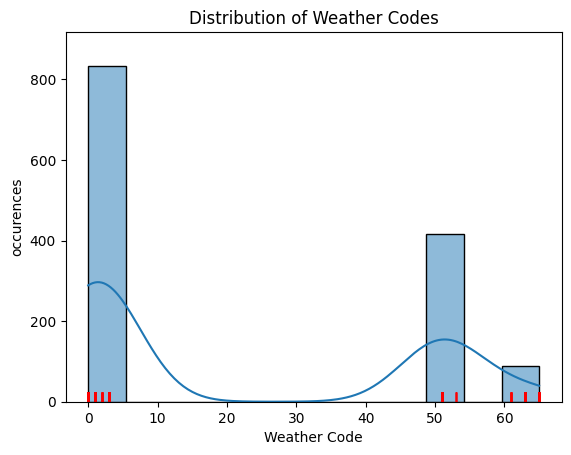

In [ ]:
# Visualizing the distribution of the 'weather_code' feature
sns.histplot(data=final_merged_data, x='weather_code', kde=True)
sns.rugplot(data=final_merged_data, x='weather_code', color='red')
plt.xlabel('Weather Code')
plt.ylabel('occurences')
plt.title('Distribution of Weather Codes');

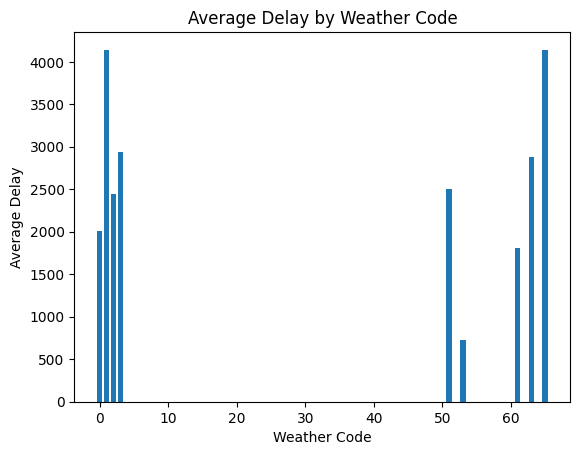

In [ ]:
# Visualizing the distribution of 'weather_code' compared to average flight delays
plt.bar(final_merged_data['weather_code'], final_merged_data['arr_del15'])
plt.xlabel('Weather Code')
plt.ylabel('Average Delay')
plt.title('Average Delay by Weather Code');

3.4.2 Visualizing weather conditions

The features to be visualized are `temperature_2m_max`, `precipitation_sum`, and `wind_speed_10m_max`. The purpose is to compare each feature to the overall flight delays to see if any insights can be gained. This information may assist in determining which specific weather conditions affect flight delays compared to others.

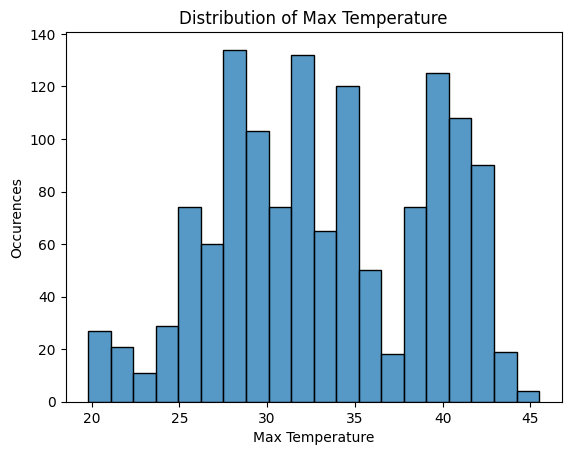

In [ ]:
# Vizualizing the distribution of 'temperature_2m_max'
sns.histplot(final_merged_data, x = 'temperature_2m_max', bins = 20)
plt.xlabel('Max Temperature')
plt.ylabel('Occurences')
plt.title('Distribution of Max Temperature');

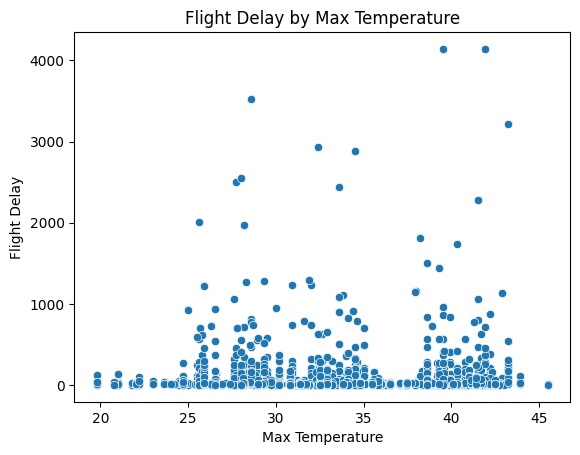

In [ ]:
# Visualizing the distribution of 'temperature_2m_max' compared to flight delays
sns.scatterplot(data = final_merged_data, x = 'temperature_2m_max', y='arr_del15')
plt.xlabel('Max Temperature')
plt.ylabel('Flight Delay')
plt.title('Flight Delay by Max Temperature');

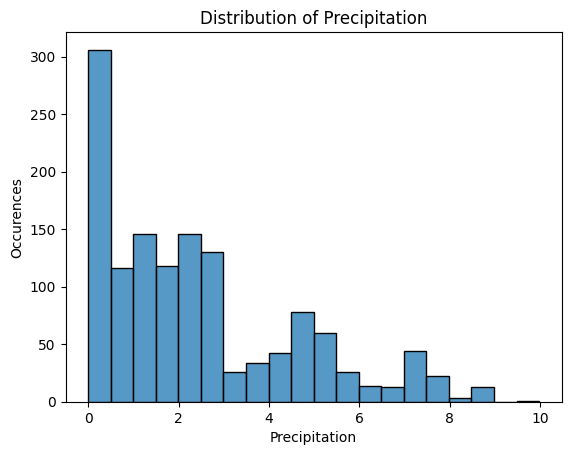

In [ ]:
# Vizualizing the distribution of 'precipitation_sum'
sns.histplot(final_merged_data, x = 'precipitation_sum', bins = 20)
plt.xlabel('Precipitation')
plt.ylabel('Occurences')
plt.title('Distribution of Precipitation');

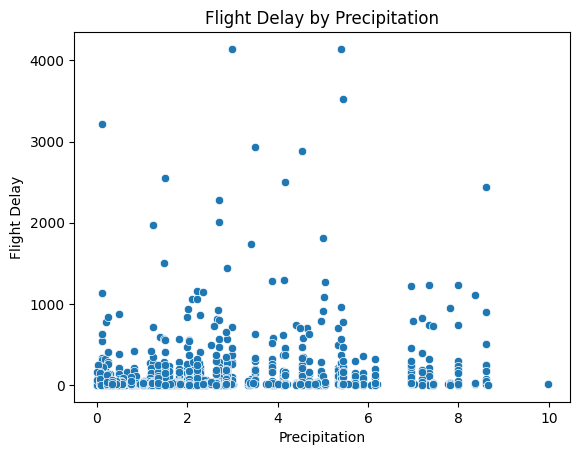

In [ ]:
# Visualizing the distribution of 'precipitation_sum' compared to flight delays
sns.scatterplot(data = final_merged_data, x = 'precipitation_sum', y='arr_del15')
plt.xlabel('Precipitation')
plt.ylabel('Flight Delay')
plt.title('Flight Delay by Precipitation');

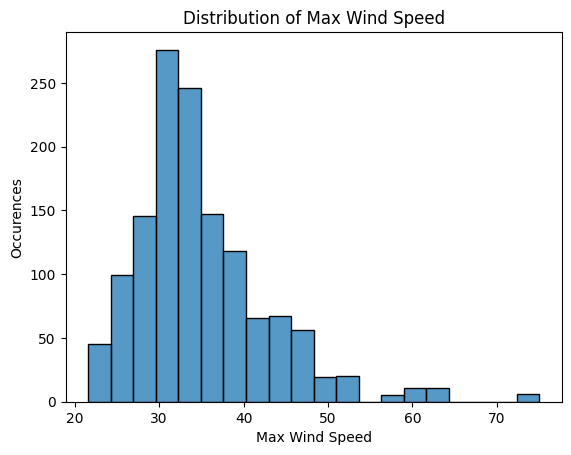

In [ ]:
# Vizualizing the distribution of 'wind_speed_10m_max'
sns.histplot(final_merged_data, x = 'wind_speed_10m_max', bins = 20)
plt.xlabel('Max Wind Speed')
plt.ylabel('Occurences')
plt.title('Distribution of Max Wind Speed');

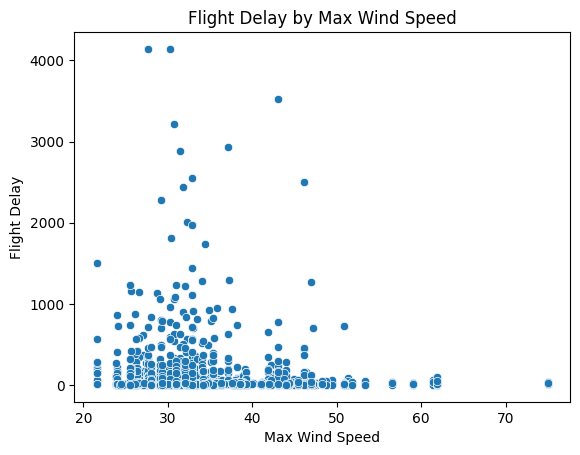

In [ ]:
# Visualizing the distribution of 'wind_speed_10m_max' compared to flight delays
sns.scatterplot(data = final_merged_data, x = 'wind_speed_10m_max', y='arr_del15')
plt.xlabel('Max Wind Speed')
plt.ylabel('Flight Delay')
plt.title('Flight Delay by Max Wind Speed');

3.4.3 Visualizing monthly flight delays by airport location

This section will seek to find flight delay trends for both individual airports and all of the 21 selected Texas airports. This information may assist in determining how geographic location affects flight delays.

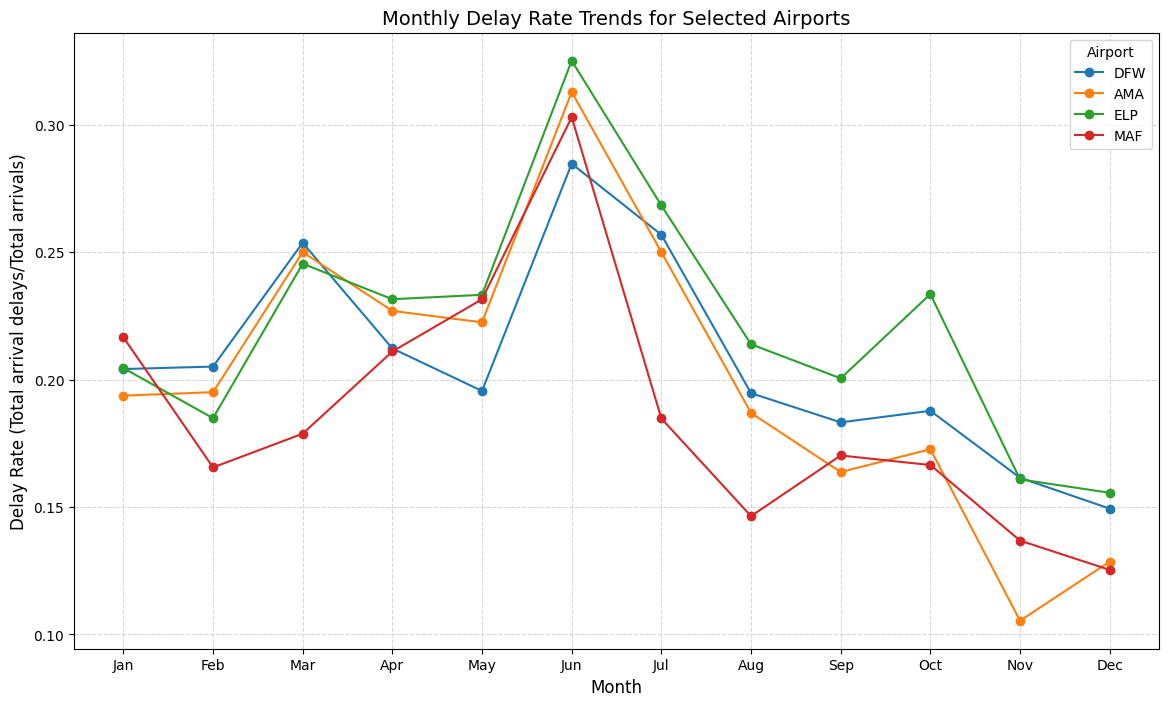

In [ ]:
#Visualing the monthly trend of arrival delay rate across the airports located in top 4 geographically challenging regions using a line chart

# Filter the data for the selected airports. These airports are located in the geographically challenging areas in Texas
selected_airports = ['DFW', 'AMA', 'ELP', 'MAF']
filtered_data = final_merged_data[final_merged_data['airport'].isin(selected_airports)]

# Group by month and airport, then calculate the sum of arr_del15 and arr_flights to get the details of all the carriers
aggregated_data_for_selected_airports = filtered_data.groupby(['month', 'airport']).agg({
    'arr_del15': 'sum',
    'arr_flights': 'sum'
}).reset_index()

# Calculate the overall delay fraction using the sums
aggregated_data_for_selected_airports['delay_rate'] = aggregated_data_for_selected_airports['arr_del15'] / aggregated_data_for_selected_airports['arr_flights']

# Convert numeric month to abbreviated month names
aggregated_data_for_selected_airports['month'] = aggregated_data_for_selected_airports['month'].astype(int).apply(lambda x: calendar.month_abbr[x])

# Specify the correct order of months as a categorical type
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
aggregated_data_for_selected_airports['month'] = pd.Categorical(aggregated_data_for_selected_airports['month'], categories=month_order, ordered=True)

# Sort the data by month to ensure proper order in the plot
aggregated_data_for_selected_airports = aggregated_data_for_selected_airports.sort_values('month')

# Plot the line chart for each selected airport
plt.figure(figsize=(14, 8))
for airport in selected_airports:
    airport_data = aggregated_data_for_selected_airports[aggregated_data_for_selected_airports['airport'] == airport]
    plt.plot(airport_data['month'], airport_data['delay_rate'], marker='o', label=airport)

plt.title('Monthly Delay Rate Trends for Selected Airports', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay Rate (Total arrival delays/Total arrivals)', fontsize=12)
plt.xticks()  # Rotate month labels for better readability
plt.legend(title='Airport')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

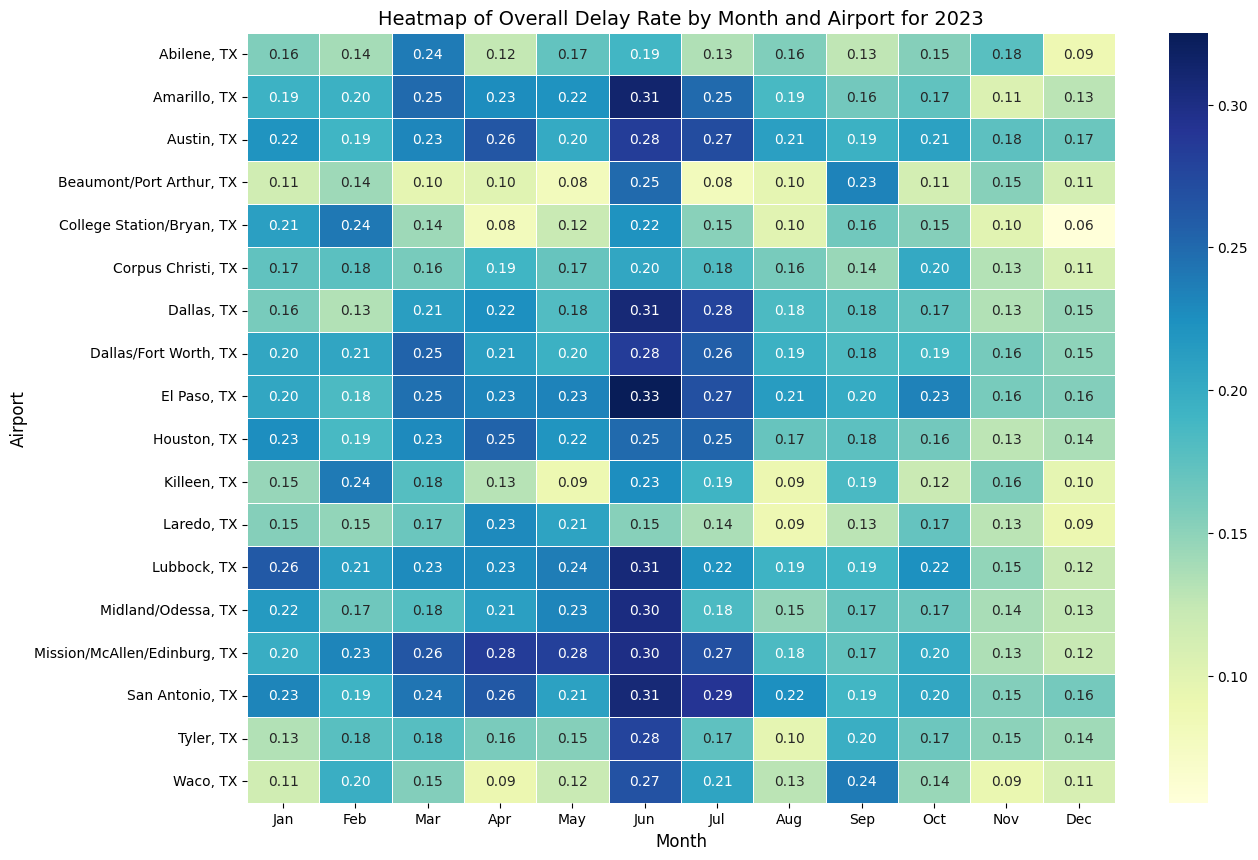

In [ ]:
#Visualing the monthly trend of arrival delay rate across all the airports considered for the project using a heat map

# Group by month and airport, then calculate the total delayed flights and total flights
aggregated_data = final_merged_data.groupby(['month', 'City']).agg({
    'arr_del15': 'sum',
    'arr_flights': 'sum'
}).reset_index()

# Calculate the overall delay fraction
aggregated_data['delay_rate'] = aggregated_data['arr_del15'] / aggregated_data['arr_flights']

# Convert numeric month to abbreviated month names
aggregated_data['month'] = aggregated_data['month'].astype(int).apply(lambda x: calendar.month_abbr[x])

# Create a pivot table to prepare the data for the heatmap
heatmap_data = aggregated_data.pivot_table(index='City', columns='month', values='delay_rate')

# Reorder the columns to ensure months are in order
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
heatmap_data = heatmap_data[month_order]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Overall Delay Rate by Month and Airport for 2023', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Airport', fontsize=12)
plt.show()


#**Section 4: Key Insights**

These are some insights the group gained after completing our analysis.

1. Weather code distribution clearly shows that druing 2023, in the texas airports considered for the project, there are no flight delays during moderate weather conditions.
2. Both the heat map and the line chart shows that the month "June" usually has a lot of flight delays across all the airports considered in the project.
3. In addition, the month of December has the least arrival flight delay rates across all the airports, and the aiport in the city "Beaumont/Port Arthur, TX" comparably has less arrival flight delay rates across the whole year 2023.
4. As we see in the wind speed distribution when compared to flight delays, wind speeds between 25 km/h and 40 km/h have a strong correlation to flight delays.